In [61]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import math
import numpy as np
from scipy import stats
from scipy.stats import norm
import pandas as pd

import seaborn as sns

In [25]:
tickers = [a.strip('\n') for a in open('./tickers.txt').readlines()] 

In [56]:
def compute_stats(start_date,end):
    t_lst=[]
    mu_lst=[]
    sig2_lst=[]
    sk_lst=[]
    ku_lst=[]
    corrs = []

    companies=[]

    SNP = data.DataReader("^GSPC", 'yahoo', start_date, end)

    SNP['Log']=np.log(SNP['Adj Close'])
    Returns=np.diff(SNP['Log'])*100
    Returns=np.append(0,Returns)
    SNP['Returns']=Returns

    for i,t in enumerate(tickers):
        try:
            print(i)
            company = data.DataReader(t, 'yahoo', start_date, end)

            company['Log']=np.log(company['Adj Close'])
            Returns=np.diff(company['Log'])*100
            Returns=np.append(0,Returns)
            company['Returns']=Returns

            T = len(company['Returns'])
            mu=(1/T)*np.sum(company['Returns'])
            sig2 = 1/(T-1) * np.sum([np.square((x - mu)) for x in company['Returns']])
            sk = 1/((T-1) * math.pow(math.sqrt(sig2),3)) * np.sum([math.pow(x - mu,3) for x in company['Returns']])
            ku = 1/((T-1) * math.pow(math.sqrt(sig2),4)) * np.sum([math.pow(x - mu,4) for x in company['Returns']])-3    

            merged = company.merge(SNP,how='left',on='Date')
            corr = np.corrcoef(merged['Returns_x'],merged['Returns_y'])[0][1]

            t_lst.append(t)
            mu_lst.append(mu)
            sig2_lst.append(sig2)
            sk_lst.append(sk)
            ku_lst.append(ku)
            corrs.append(corr)

            companies.append(company)
        except:
            print('err')

    stock_stats = pd.DataFrame()

    stock_stats['mu'] = mu_lst
    stock_stats['sig2'] = sig2_lst
    stock_stats['sk'] = sk_lst
    stock_stats['ku'] = ku_lst
    stock_stats['corr'] = corrs
    stock_stats['ticker'] = t_lst
    

    return companies, stock_stats, SNP

In [27]:
# 2009 - today 

start_date = '2009-01-01'
end = datetime.date.today()


companies, stock_stats, SNP = compute_stats(start_date,end)

companies_post_crisis = companies
stock_stats_post_crisis = stock_stats
SNP_post_crisis = SNP

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [57]:
# before 2007

start_date = '1990-01-01'
end = '2007-01-01'


companies, stock_stats, SNP = compute_stats(start_date,end)

companies_pre_crisis = companies
stock_stats_pre_crisis = stock_stats
SNP_pre_crisis = SNP

0
1
2
3
4
err
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
err
21
22
23
24
err
25
26
27
28
29
err
30
31
32
err
33
34
35
36
37
38
39
err
40
41
42
43
44
45
46
47
48
err
49
50
51
52
53
err
54
55
err
56
57
58
59
60
61
62
63
64
65
err
66
67
68
69
70
71
72
73
err
74
75
76
77
78
79
80
81
82
err
83
84
85
86
87
88
89
90
91
92
err
93
94
95
err
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
err
114
115
err
116
117
118
119
120
121
122
123
124
125
126
err
127
128
err
129
130
err
131
err
132
err
133
134
135
136
137
err
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
err
163
164
165
166
167
err
168
169
170
171
172
173
174
err
175
176
err
177
err
178
179
180
181
182
183
184
185
186
187
188
189
err
190
191
192
193
err
194
195
196
err
197
err
198
199
200
201
202
203
err
204
205
206
207
208
209
210
211
212
213
214
215
216
217
err
218
219
220
221
222
223
err
224
err
225
226
227
228
229
err
230
231
232
233
234
235
236
237
238
239
240
24

In [60]:
# 2007 - today

start_date = '2007-01-01'
end = datetime.date.today()


companies, stock_stats, SNP = compute_stats(start_date,end)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [179]:
def plot(variable):
    var = np.var(variable)
    mean = np.mean(variable)

    norm = np.random.normal(mean,var,len(variable))
    

    sns.kdeplot(variable,color='red')
    locs,labels = plt.xticks()
    
    y_locs,y_labels = plt.yticks()

#     sns.kdeplot(norm,color='blue')    

    
    plt.show()
    


mean
2007-now 


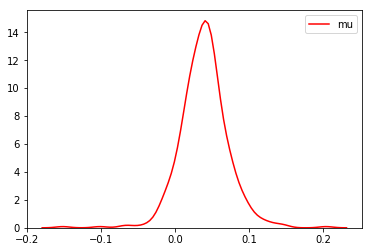

before 2007


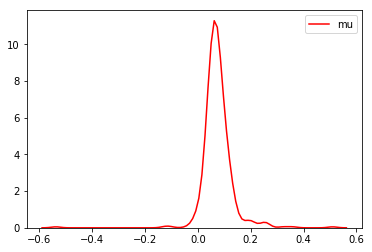

2009 - now 


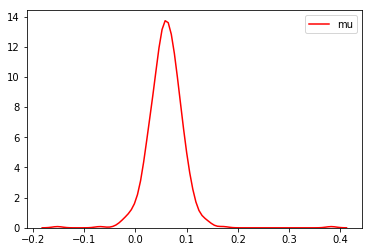

In [180]:
# Comparison between different periods for different mesures 

metric = 'mu'

print('mean')

print('2007-now ')
plot(stock_stats[metric]) # 2007-now 
print('before 2007')
plot(stock_stats_pre_crisis[metric]) # before 2007 
print('2009 - now ')
plot(stock_stats_post_crisis[metric]) # 2009 - now 


variance
2007-now 


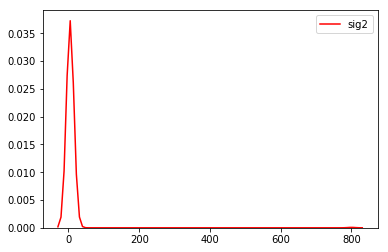

before 2007


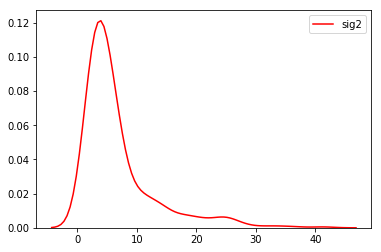

2009 - now 


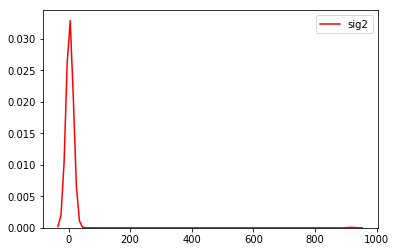

In [181]:
metric = 'sig2'

print('variance')

print('2007-now ')
plot(stock_stats[metric]) # 2007-now 
print('before 2007')
plot(stock_stats_pre_crisis[metric]) # before 2007 
print('2009 - now ')
plot(stock_stats_post_crisis[metric]) # 2009 - now 

skewness
2007-now 


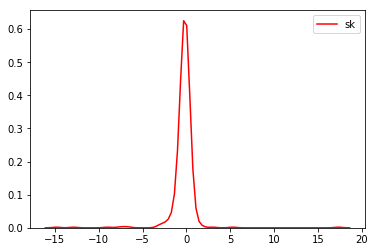

before 2007


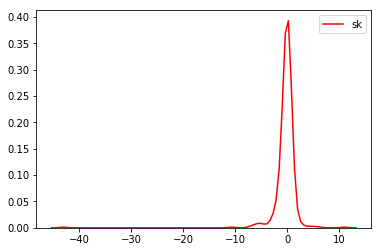

2009 - now 


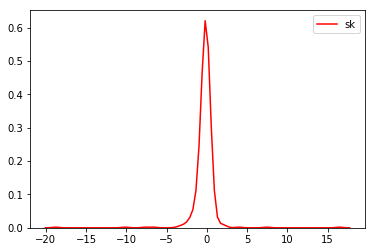

In [182]:
metric = 'sk'

print('skewness')

print('2007-now ')
plot(stock_stats[metric]) # 2007-now 
print('before 2007')
plot(stock_stats_pre_crisis[metric]) # before 2007 
print('2009 - now ')
plot(stock_stats_post_crisis[metric]) # 2009 - now 

kurtosis
2007-now 


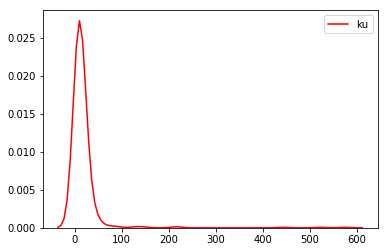

before 2007


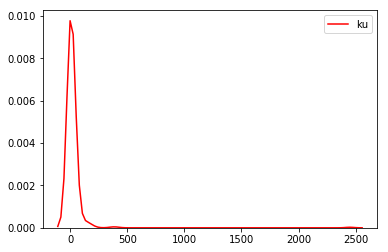

2009 - now 


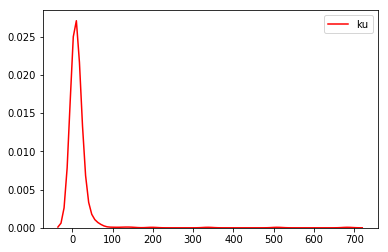

In [183]:
metric = 'ku'

print('kurtosis')

print('2007-now ')
plot(stock_stats[metric]) # 2007-now 
print('before 2007')
plot(stock_stats_pre_crisis[metric]) # before 2007 
print('2009 - now ')
plot(stock_stats_post_crisis[metric]) # 2009 - now 

correlation between stock returns and the S&P 500 index return
2007-now 


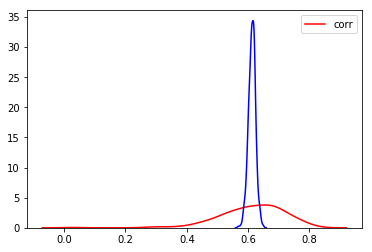

before 2007


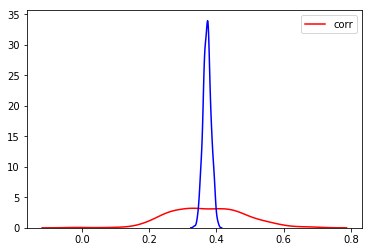

2009 - now 


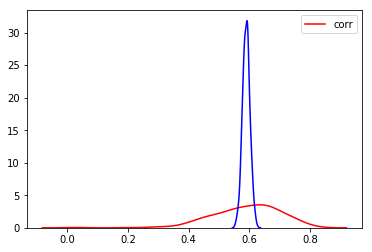

In [174]:
metric = 'corr'

print('correlation between stock returns and the S&P 500 index return')

print('2007-now ')
plot(stock_stats[metric]) # 2007-now 
print('before 2007')
plot(stock_stats_pre_crisis[metric]) # before 2007 
print('2009 - now ')
plot(stock_stats_post_crisis[metric]) # 2009 - now 

In [108]:
# Kolmogorov Smirnov test
from scipy import stats

print('comparison between pre crisis and post crisis \n')

print('mean')
print(stats.ks_2samp(stock_stats_pre_crisis['mu'],stock_stats_post_crisis['mu']))
print('\n')

print('variance')
print(stats.ks_2samp(stock_stats_pre_crisis['sig2'],stock_stats_post_crisis['sig2']))
print('\n')

print('skewenes')
print(stats.ks_2samp(stock_stats_pre_crisis['sk'],stock_stats_post_crisis['sk']))
print('\n')

print('kurtosis')
print(stats.ks_2samp(stock_stats_pre_crisis['ku'],stock_stats_post_crisis['ku']))
print('\n')

print('correlation between stock returns and the S&P 500 index return')
print(stats.ks_2samp(stock_stats_pre_crisis['corr'],stock_stats_post_crisis['corr']))
print('\n')

comparison between pre crisis and post crisis 

mean
Ks_2sampResult(statistic=0.14461420373551664, pvalue=9.806944113582352e-05)


variance
Ks_2sampResult(statistic=0.23245549910449942, pvalue=1.4661650120160082e-11)


skewenes
Ks_2sampResult(statistic=0.1810281808545634, pvalue=3.5320459040925407e-07)


kurtosis
Ks_2sampResult(statistic=0.13081618480207613, pvalue=0.0005951994363523208)


correlation between stock returns and the S&P 500 index return
Ks_2sampResult(statistic=0.6892613034102124, pvalue=2.5313313532828972e-98)




1- Comparing the graphs

We observe that the variance has gone down, probably due to the stricter regulations on security markets that came in place post crisis. 
The mean has aslo decreased, supports the observation that returns fluctuated less after the crisis than before. 
The skewness is on average less after the crisis, which once again implies less risk. The proportion of negatively skewed stocks is the same before and after.
The kurtosis is also lower after the crisis. 

The stock returned are much more correlated with the S&P index returns, which implies more efficient markets.

2 - Kolmogorov-smirnopv test 
Since the P values are very small for all the statistics, we can reject the null hypothesis that 2 distributions are similar. This confirms our observations from the PDFs of the pre crisis and post crisis data.
